In [1]:
from utils_ray import get_info_state, activate_memory_growth; activate_memory_growth(cpu=False)
import tensorflow as tf
from copy import deepcopy, copy
import clubs
import clubs_gym
import gym
from PokerAgent import TensorflowAgent
import time
from random import shuffle
import time
import numpy as np

[INFO] - Models trained on GPU, with memory growth activated.


In [2]:
render_mode = False
env_str = 'LDRL-Poker-v0'
random_model_path = 'value_model_p_0'
trained_model_path = 'value_model_p_0'
agent_fct = TensorflowAgent

# Set game parameters
env_str = 'LDRL-Poker-v0'
num_players = 2
num_streets = 2
num_raises = 3
num_actions = 6
num_cards = [2, 3]

n_community_cards = [0] + num_cards[1:]
n_cards_for_hand = min(5, sum(num_cards))
max_bet_number = num_players * num_streets * num_raises

# environment params dict
config_dict = {'num_players': num_players,
                'num_streets': num_streets,
                'blinds': [1, 2],
                'antes': 0,
                'raise_sizes': [2, 4],
                'num_raises': num_raises,
                'num_suits': 4,
                'num_ranks': 7,
                'num_hole_cards': num_cards[0],
                'mandatory_num_hole_cards': 0,
                'num_community_cards': n_community_cards,
                'start_stack': 1_000_000,
                'num_cards_for_hand': n_cards_for_hand}

In [3]:
clubs_gym.envs.register({env_str: config_dict})
env = gym.make(env_str)

# create new agents
env.register_agents([agent_fct(model_save_path) for model_save_path in [random_model_path, trained_model_path]])

In [7]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot():
    clear_output(wait=True)
    fig, axs = plt.subplots(2,1, figsize=(10, 10))

    axs[0].plot(range(0, reward_history.shape[0]), reward_history[:,0])
    # axs[0].plot(range(0, reward_history.shape[0]), reward_history[:,1])
    axs[0].set_title("Player 0's payoff for each game")
    axs[0].set_xlabel('Game')
    axs[0].set_ylabel('Payoff')

    cum_rew_p_0 = cumulative_reward(reward_history[:,0])
    # cum_rew_p_1 = cumulative_reward(reward_history[:,1])

    axs[1].plot(range(0, len(cum_rew_p_0)), cum_rew_p_0)
    # axs[1].plot(range(0, len(cum_rew_p_1)), cum_rew_p_1)
    axs[1].set_title("Player 0's cumulative payoff")
    axs[1].set_xlabel('Game')
    axs[1].set_ylabel('cumulative Payoff')

    plt.show()
    
def cumulative_reward(data):
    average = [0]
    
    for value in data:
        average.append(average[-1]+value)
        
    return average

In [8]:
reward_history = None

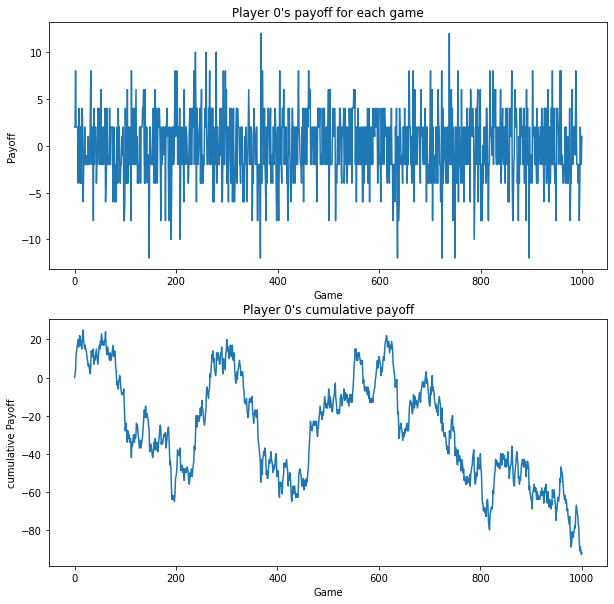

In [9]:
env.reset()
env.render()

how_many_games = input('Open the rendered Game, input how many games you wanna see and hit Enter to start.')
for i in range(int(how_many_games)):
    obs = env.reset()
    
    if render_mode:
        end.render()
        time.sleep(2)
    
    history = []
    while True:
         if render_mode:
            time.sleep(2)
        
        # terminal state
        if not all(obs['active']) or obs['action'] == -1:
            
            # save results      
            if reward_history is None:
                reward_history = np.array([rewards])
            else:
                reward_history = np.append(reward_history, [rewards], axis=0)
            
            # fancy print stuff
            live_plot()
            break
        
        # non terminal-state
        else:
            # agent chooses bet/action based on info_state
            info_state = get_info_state(obs, history, max_bet_number, env.dealer.num_streets, config_dict)
            bet = env.act(info_state)
            history.append(bet)     
           
            # take action within environment
            obs, rewards, done, _ = env.step(bet)
    
            if render_mode:
                print(f'action player_{obs["action"]}: {bet}')
                env.render()


In [ ]:
fig, axs = plt.subplots(2,1, figsize=(10, 10))

axs[0].plot(range(0, reward_history.shape[0]), reward_history[:,0])
# axs[0].plot(range(0, reward_history.shape[0]), reward_history[:,1])
axs[0].set_title("Player 0's payoff for each game")
axs[0].set_xlabel('Game')
axs[0].set_ylabel('Payoff')

cum_rew_p_0 = cumulative_reward(reward_history[:,0])
# cum_rew_p_1 = cumulative_reward(reward_history[:,1])

axs[1].plot(range(0, len(cum_rew_p_0)), cum_rew_p_0)
# axs[1].plot(range(0, len(cum_rew_p_1)), cum_rew_p_1)
axs[1].set_title("Player 0's cumulative payoff")
axs[1].set_xlabel('Game')
axs[1].set_ylabel('cumulative Payoff')

plt.show()